/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


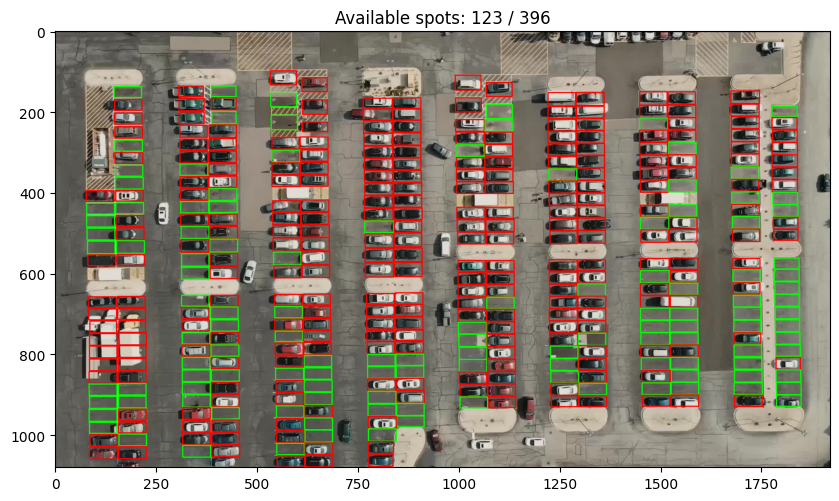

Processed image saved at: /kaggle/working/processed_parking_image.jpg


In [12]:
import pickle
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Constants for empty and not empty spots
EMPTY = True
NOT_EMPTY = False

# Load the trained model
MODEL = pickle.load(open("/kaggle/input/datafiles/model.p", "rb"))

# Function to check if a parking spot is empty or not
def empty_or_not(spot_bgr):
    flat_data = []
    img_resized = resize(spot_bgr, (15, 15, 3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_output = MODEL.predict(flat_data)
    if y_output == 0:
        return EMPTY
    else:
        return NOT_EMPTY

# Function to get parking spots bounding boxes from connected components
def get_parking_spots_bboxes(connected_components):
    (totalLabels, label_ids, values, centroid) = connected_components
    slots = []
    coef = 1
    for i in range(1, totalLabels):
        x1 = int(values[i, cv2.CC_STAT_LEFT] * coef)
        y1 = int(values[i, cv2.CC_STAT_TOP] * coef)
        w = int(values[i, cv2.CC_STAT_WIDTH] * coef)
        h = int(values[i, cv2.CC_STAT_HEIGHT] * coef)
        slots.append([x1, y1, w, h])
    return slots

# Function to calculate the difference between two images
def calc_diff(im1, im2):
    return np.abs(np.mean(im1) - np.mean(im2))

# Path to the mask image
mask_path = '/kaggle/input/datafiles/mask_1920_1080.png'
mask = cv2.imread(mask_path, 0)

# Connected components analysis on the mask
connected_components = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)

# Get parking spots bounding boxes
spots = get_parking_spots_bboxes(connected_components)
spots_status = [None for _ in spots]
diffs = [None for _ in spots]
previous_frame = None

# Path to the image you want to process
image_path = '/kaggle/input/datafiles/parking-1920-1080.jpg'
frame = cv2.imread(image_path)

# Check if the image is loaded successfully
if frame is not None:
    spots_status = [None for _ in spots]
    diffs = [None for _ in spots]

    # Loop through each parking spot
    for spot_indx, spot in enumerate(spots):
        x1, y1, w, h = spot
        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        diffs[spot_indx] = calc_diff(spot_crop, np.zeros_like(spot_crop))  # Assuming no previous frame

    max_diff = np.amax(diffs)
    arr_ = [j for j in np.argsort(diffs) if max_diff > 0 and diffs[j] / max_diff > 0.4]

    for spot_indx in arr_:
        spot = spots[spot_indx]
        x1, y1, w, h = spot

        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        spot_status = empty_or_not(spot_crop)

        spots_status[spot_indx] = spot_status

    # Replace None with False for spots that are not processed
    spots_status = [False if status is None else status for status in spots_status]

    for spot_indx, spot in enumerate(spots):
        spot_status = spots_status[spot_indx]
        x1, y1, w, h = spot

        if spot_status:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
        else:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 0, 255), 2)

    # Increase the size of the figure
    plt.figure(figsize=(10, 8))

    # Display the image with rectangles
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Available spots: {} / {}'.format(str(sum(spots_status)), str(len(spots_status) - spots_status.count(None))))
    
    # Save the processed image
    output_image_path = '/kaggle/working/processed_parking_image.jpg'
    plt.savefig(output_image_path)
    
    # Show the plot
    plt.show()
    
    print(f"Processed image saved at: {output_image_path}")
else:
    print("Failed to read the image.")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


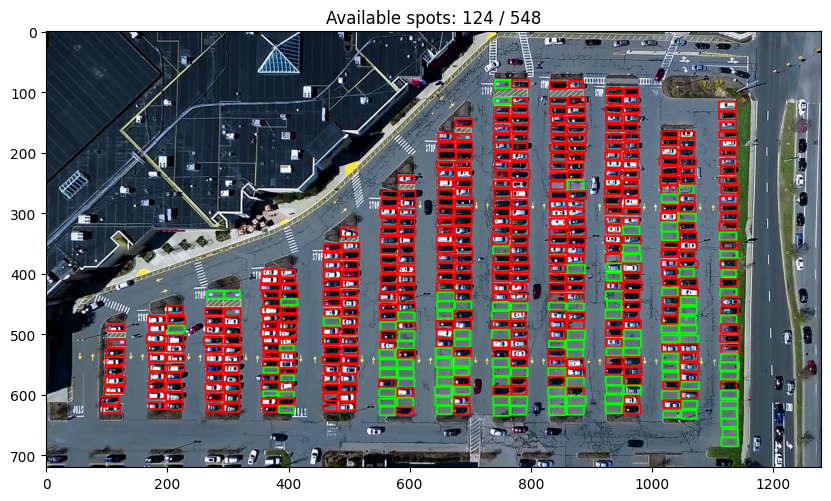

Processed image saved at: /kaggle/working/processed_image.jpg


In [11]:
import pickle
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Constants for empty and not empty spots
EMPTY = True
NOT_EMPTY = False

# Load the trained model
MODEL = pickle.load(open("/kaggle/input/datafiles/model.p", "rb"))

# Function to check if a parking spot is empty or not
def empty_or_not(spot_bgr):
    flat_data = []
    img_resized = resize(spot_bgr, (15, 15, 3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_output = MODEL.predict(flat_data)
    if y_output == 0:
        return EMPTY
    else:
        return NOT_EMPTY

# Function to get parking spots bounding boxes from connected components
def get_parking_spots_bboxes(connected_components):
    (totalLabels, label_ids, values, centroid) = connected_components
    slots = []
    coef = 1
    for i in range(1, totalLabels):
        x1 = int(values[i, cv2.CC_STAT_LEFT] * coef)
        y1 = int(values[i, cv2.CC_STAT_TOP] * coef)
        w = int(values[i, cv2.CC_STAT_WIDTH] * coef)
        h = int(values[i, cv2.CC_STAT_HEIGHT] * coef)
        slots.append([x1, y1, w, h])
    return slots

# Function to calculate the difference between two images
def calc_diff(im1, im2):
    return np.abs(np.mean(im1) - np.mean(im2))

# Path to the mask image
mask_path = '/kaggle/input/datafiles/result.png'
mask = cv2.imread(mask_path, 0)

# Connected components analysis on the mask
connected_components = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)

# Get parking spots bounding boxes
spots = get_parking_spots_bboxes(connected_components)
spots_status = [None for _ in spots]
diffs = [None for _ in spots]
previous_frame = None

# Frame number, flag for video reading, and step
frame_nmr = 0
ret = True
step = 50

# Path to the image you want to process
image_path = '/kaggle/input/datafiles/scene1380.jpg'
frame = cv2.imread(image_path)

# Check if the image is loaded successfully
if frame is not None:
    spots_status = [None for _ in spots]
    diffs = [None for _ in spots]

    # Loop through each parking spot
    for spot_indx, spot in enumerate(spots):
        x1, y1, w, h = spot
        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        diffs[spot_indx] = calc_diff(spot_crop, np.zeros_like(spot_crop))  # Assuming no previous frame

    max_diff = np.amax(diffs)
    arr_ = [j for j in np.argsort(diffs) if max_diff > 0 and diffs[j] / max_diff > 0.4]

    for spot_indx in arr_:
        spot = spots[spot_indx]
        x1, y1, w, h = spot

        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        spot_status = empty_or_not(spot_crop)

        spots_status[spot_indx] = spot_status

    # Replace None with False for spots that are not processed
    spots_status = [False if status is None else status for status in spots_status]

    # Loop through each parking spot and draw rectangles on the image
    for spot_indx, spot in enumerate(spots):
        spot_status = spots_status[spot_indx]
        x1, y1, w, h = spot

        if spot_status:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
        else:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 0, 255), 2)

    # Increase the size of the figure
    plt.figure(figsize=(10, 8))

    # Display the image with rectangles
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Available spots: {} / {}'.format(str(sum(spots_status)), str(len(spots_status) - spots_status.count(None))))
    
    # Save the processed image
    output_image_path = '/kaggle/working/processed_image.jpg'
    plt.savefig(output_image_path)
    
    # Show the plot
    plt.show()
    
    print(f"Processed image saved at: {output_image_path}")
else:
    print("Failed to read the image.")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


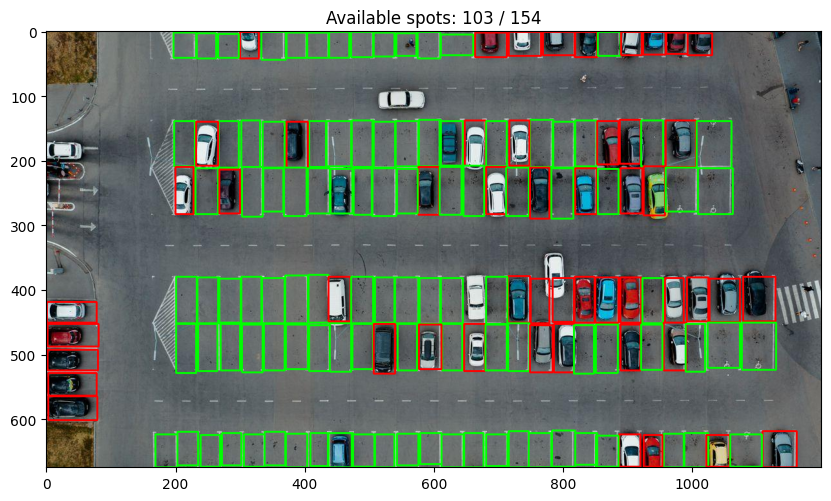

Processed image saved at: /kaggle/working/processed_image2.jpg


In [2]:
import pickle
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Constants for empty and not empty spots
EMPTY = True
NOT_EMPTY = False

# Load the trained model
MODEL = pickle.load(open("/kaggle/input/datafiles/model.p", "rb"))

# Function to check if a parking spot is empty or not
def empty_or_not(spot_bgr):
    flat_data = []
    img_resized = resize(spot_bgr, (15, 15, 3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_output = MODEL.predict(flat_data)
    if y_output == 0:
        return EMPTY
    else:
        return NOT_EMPTY

# Function to get parking spots bounding boxes from connected components
def get_parking_spots_bboxes(connected_components):
    (totalLabels, label_ids, values, centroid) = connected_components
    slots = []
    coef = 1
    for i in range(1, totalLabels):
        x1 = int(values[i, cv2.CC_STAT_LEFT] * coef)
        y1 = int(values[i, cv2.CC_STAT_TOP] * coef)
        w = int(values[i, cv2.CC_STAT_WIDTH] * coef)
        h = int(values[i, cv2.CC_STAT_HEIGHT] * coef)
        slots.append([x1, y1, w, h])
    return slots

# Function to calculate the difference between two images
def calc_diff(im1, im2):
    return np.abs(np.mean(im1) - np.mean(im2))

# Path to the mask image
mask_path = '/kaggle/input/result1/result1.png'
mask = cv2.imread(mask_path, 0)

# Connected components analysis on the mask
connected_components = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)

# Get parking spots bounding boxes
spots = get_parking_spots_bboxes(connected_components)
spots_status = [None for _ in spots]
diffs = [None for _ in spots]
previous_frame = None

# Frame number, flag for video reading, and step
frame_nmr = 0
ret = True
step = 50

# Path to the image you want to process
image_path = '/kaggle/input/result1/GettyImages_1354859135__1_-0_jpg.rf.3de9921e147b6547c4d67d122d8635b1.jpg'
frame = cv2.imread(image_path)

# Check if the image is loaded successfully
if frame is not None:
    spots_status = [None for _ in spots]
    diffs = [None for _ in spots]

    # Loop through each parking spot
    for spot_indx, spot in enumerate(spots):
        x1, y1, w, h = spot
        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        diffs[spot_indx] = calc_diff(spot_crop, np.zeros_like(spot_crop))  # Assuming no previous frame

    max_diff = np.amax(diffs)
    arr_ = [j for j in np.argsort(diffs) if max_diff > 0 and diffs[j] / max_diff > 0.4]

    for spot_indx in arr_:
        spot = spots[spot_indx]
        x1, y1, w, h = spot

        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        spot_status = empty_or_not(spot_crop)

        spots_status[spot_indx] = spot_status

    # Replace None with False for spots that are not processed
    spots_status = [False if status is None else status for status in spots_status]

    # Loop through each parking spot and draw rectangles on the image
    for spot_indx, spot in enumerate(spots):
        spot_status = spots_status[spot_indx]
        x1, y1, w, h = spot

        if spot_status:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
        else:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 0, 255), 2)

    # Increase the size of the figure
    plt.figure(figsize=(10, 8))

    # Display the image with rectangles
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Available spots: {} / {}'.format(str(sum(spots_status)), str(len(spots_status) - spots_status.count(None))))
    
    # Save the processed image
    output_image_path = '/kaggle/working/processed_image2.jpg'
    plt.savefig(output_image_path)
    
    # Show the plot
    plt.show()
    
    print(f"Processed image saved at: {output_image_path}")
else:
    print("Failed to read the image.")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


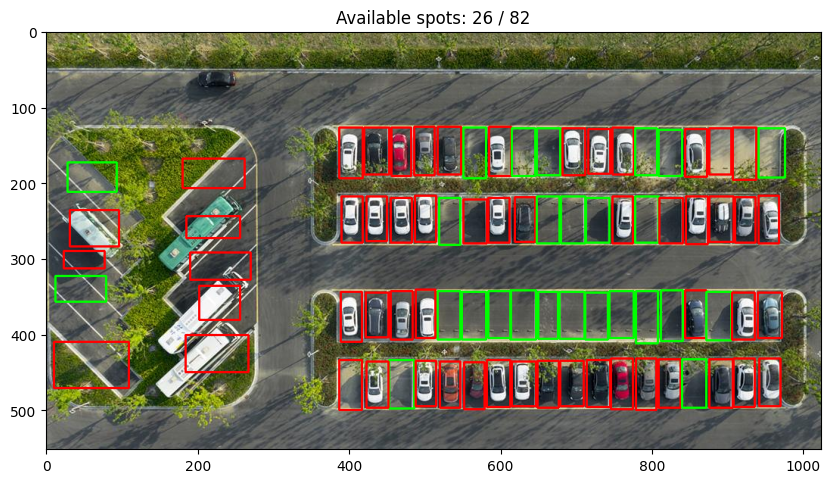

Processed image saved at: /kaggle/working/processed_image3.jpg


In [3]:
import pickle
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Constants for empty and not empty spots
EMPTY = True
NOT_EMPTY = False

# Load the trained model
MODEL = pickle.load(open("/kaggle/input/datafiles/model.p", "rb"))

# Function to check if a parking spot is empty or not
def empty_or_not(spot_bgr):
    flat_data = []
    img_resized = resize(spot_bgr, (15, 15, 3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_output = MODEL.predict(flat_data)
    if y_output == 0:
        return EMPTY
    else:
        return NOT_EMPTY

# Function to get parking spots bounding boxes from connected components
def get_parking_spots_bboxes(connected_components):
    (totalLabels, label_ids, values, centroid) = connected_components
    slots = []
    coef = 1
    for i in range(1, totalLabels):
        x1 = int(values[i, cv2.CC_STAT_LEFT] * coef)
        y1 = int(values[i, cv2.CC_STAT_TOP] * coef)
        w = int(values[i, cv2.CC_STAT_WIDTH] * coef)
        h = int(values[i, cv2.CC_STAT_HEIGHT] * coef)
        slots.append([x1, y1, w, h])
    return slots

# Function to calculate the difference between two images
def calc_diff(im1, im2):
    return np.abs(np.mean(im1) - np.mean(im2))

# Path to the mask image
mask_path = '/kaggle/input/result3/result2.png'
mask = cv2.imread(mask_path, 0)

# Connected components analysis on the mask
connected_components = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)

# Get parking spots bounding boxes
spots = get_parking_spots_bboxes(connected_components)
spots_status = [None for _ in spots]
diffs = [None for _ in spots]
previous_frame = None

# Frame number, flag for video reading, and step
frame_nmr = 0
ret = True
step = 50

# Path to the image you want to process
image_path = '/kaggle/input/result3/parking-lot-daylight_jpg.rf.63a7178d6e69afe844b37032347640a6.jpg'
frame = cv2.imread(image_path)

# Check if the image is loaded successfully
if frame is not None:
    spots_status = [None for _ in spots]
    diffs = [None for _ in spots]

    # Loop through each parking spot
    for spot_indx, spot in enumerate(spots):
        x1, y1, w, h = spot
        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        diffs[spot_indx] = calc_diff(spot_crop, np.zeros_like(spot_crop))  # Assuming no previous frame

    max_diff = np.amax(diffs)
    arr_ = [j for j in np.argsort(diffs) if max_diff > 0 and diffs[j] / max_diff > 0.4]

    for spot_indx in arr_:
        spot = spots[spot_indx]
        x1, y1, w, h = spot

        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        spot_status = empty_or_not(spot_crop)

        spots_status[spot_indx] = spot_status

    # Replace None with False for spots that are not processed
    spots_status = [False if status is None else status for status in spots_status]

    # Loop through each parking spot and draw rectangles on the image
    for spot_indx, spot in enumerate(spots):
        spot_status = spots_status[spot_indx]
        x1, y1, w, h = spot

        if spot_status:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
        else:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 0, 255), 2)

    # Increase the size of the figure
    plt.figure(figsize=(10, 8))

    # Display the image with rectangles
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Available spots: {} / {}'.format(str(sum(spots_status)), str(len(spots_status) - spots_status.count(None))))
    
    # Save the processed image
    output_image_path = '/kaggle/working/processed_image3.jpg'
    plt.savefig(output_image_path)
    
    # Show the plot
    plt.show()
    
    print(f"Processed image saved at: {output_image_path}")
else:
    print("Failed to read the image.")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


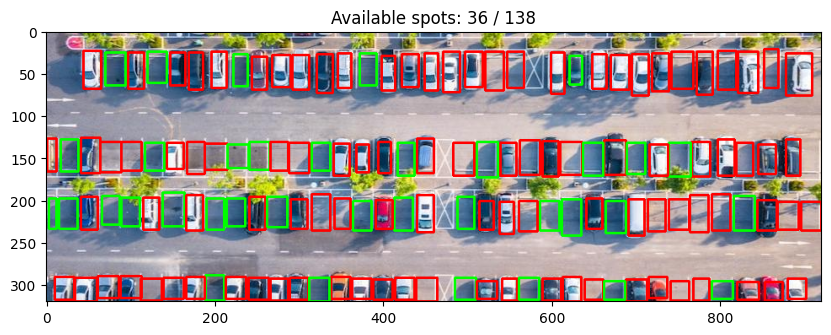

Processed image saved at: /kaggle/working/processed_image20.jpg


In [5]:
import pickle
from skimage.transform import resize
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Constants for empty and not empty spots
EMPTY = True
NOT_EMPTY = False

# Load the trained model
MODEL = pickle.load(open("/kaggle/input/datafiles/model.p", "rb"))

# Function to check if a parking spot is empty or not
def empty_or_not(spot_bgr):
    flat_data = []
    img_resized = resize(spot_bgr, (15, 15, 3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_output = MODEL.predict(flat_data)
    if y_output == 0:
        return EMPTY
    else:
        return NOT_EMPTY

# Function to get parking spots bounding boxes from connected components
def get_parking_spots_bboxes(connected_components):
    (totalLabels, label_ids, values, centroid) = connected_components
    slots = []
    coef = 1
    for i in range(1, totalLabels):
        x1 = int(values[i, cv2.CC_STAT_LEFT] * coef)
        y1 = int(values[i, cv2.CC_STAT_TOP] * coef)
        w = int(values[i, cv2.CC_STAT_WIDTH] * coef)
        h = int(values[i, cv2.CC_STAT_HEIGHT] * coef)
        slots.append([x1, y1, w, h])
    return slots

# Function to calculate the difference between two images
def calc_diff(im1, im2):
    return np.abs(np.mean(im1) - np.mean(im2))

# Path to the mask image
mask_path = '/kaggle/input/result5/result4.png'
mask = cv2.imread(mask_path, 0)

# Connected components analysis on the mask
connected_components = cv2.connectedComponentsWithStats(mask, 4, cv2.CV_32S)

# Get parking spots bounding boxes
spots = get_parking_spots_bboxes(connected_components)
spots_status = [None for _ in spots]
diffs = [None for _ in spots]
previous_frame = None

# Frame number, flag for video reading, and step
frame_nmr = 0
ret = True
step = 50

# Path to the image you want to process
image_path = '/kaggle/input/result5/1678265418-parking-2_jpg.rf.7b2105de643d0c10a547c8f616bd005c.jpg'
frame = cv2.imread(image_path)

# Check if the image is loaded successfully
if frame is not None:
    spots_status = [None for _ in spots]
    diffs = [None for _ in spots]

    # Loop through each parking spot
    for spot_indx, spot in enumerate(spots):
        x1, y1, w, h = spot
        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        diffs[spot_indx] = calc_diff(spot_crop, np.zeros_like(spot_crop))  # Assuming no previous frame

    max_diff = np.amax(diffs)
    arr_ = [j for j in np.argsort(diffs) if max_diff > 0 and diffs[j] / max_diff > 0.4]

    for spot_indx in arr_:
        spot = spots[spot_indx]
        x1, y1, w, h = spot

        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        spot_status = empty_or_not(spot_crop)

        spots_status[spot_indx] = spot_status

    # Replace None with False for spots that are not processed
    spots_status = [False if status is None else status for status in spots_status]

    # Loop through each parking spot and draw rectangles on the image
    for spot_indx, spot in enumerate(spots):
        spot_status = spots_status[spot_indx]
        x1, y1, w, h = spot

        if spot_status:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)
        else:
            frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 0, 255), 2)

    # Increase the size of the figure
    plt.figure(figsize=(10, 8))

    # Display the image with rectangles
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Available spots: {} / {}'.format(str(sum(spots_status)), str(len(spots_status) - spots_status.count(None))))
    
    # Save the processed image
    output_image_path = '/kaggle/working/processed_image20.jpg'
    plt.savefig(output_image_path)
    
    # Show the plot
    plt.show()
    
    print(f"Processed image saved at: {output_image_path}")
else:
    print("Failed to read the image.")
